In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('./func_conn.csv')
data.head()

,file,ID,target,Sex,L Aud-R Aud,L Aud-Striate,R Aud-Striate,L Aud-L DMN,R Aud-L DMN,Striate-L DMN,...,Broca-R Ant IPS,Sup Front S-R Ant IPS,R TPJ-R Ant IPS,R Pars Op-R Ant IPS,Cereb-R Ant IPS,Dors PCC-R Ant IPS,L Ins-R Ant IPS,Cing-R Ant IPS,R Ins-R Ant IPS,L Ant IPS-R Ant IPS
0,morphometry_A00007409,A00007409,No_Known_Disorder,male,0.852745,0.472408,0.438451,-0.151586,-0.175817,-0.088072,...,0.157520,0.111554,0.024794,0.074087,0.083605,0.332223,0.299678,0.378165,0.238186,0.633913
1,morphometry_A00031597,A00031597,Schizophrenia_Strict,male,0.748457,0.532091,0.617542,0.090878,0.043540,-0.036074,...,0.374588,0.340460,0.342494,0.249617,0.382124,0.604362,0.168657,0.284299,0.183674,0.626664
2,morphometry_A00022500,A00022500,Schizophrenia_Strict,female,0.592125,0.036093,0.133537,0.082847,0.179051,0.314248,...,-0.253343,-0.049419,0.103218,-0.098405,-0.106043,0.359292,-0.283070,0.194902,-0.112684,0.582636
3,morphometry_A00024953,A00024953,Schizophrenia_Strict,male,0.780837,0.354871,0.420179,0.144601,0.208352,0.168114,...,0.190040,-0.012739,-0.038590,0.150418,0.043712,0.165942,-0.003737,0.316817,-0.003129,0.633039
4,morphometry_A00001251,A00001251,Schizophrenia_Strict,male,0.447026,-0.024045,0.432331,-0.247530,0.113947,0.412405,...,-0.240672,0.271395,-0.054881,0.044233,0.063376,0.387130,0.145573,0.396055,0.112810,0.532662


In [3]:
len([col for col in data.columns if 'L Aud' in col])

38

In [4]:
len([col for col in data.columns if 'Striate' in col])

38

In [5]:
vertices_names = set()
[[vertices_names.add(val) for val in col.split('-')] for col in data.columns[4:]];
len(vertices_names)

39

In [6]:
for vert in vertices_names:
    print(len([col for col in data.columns if vert in col]))

38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
75
38
38
38
38
38
38
38


In [7]:
# connectivity_mat = np.zeros((len(vertices_names), len(vertices_names)))
names_map = {val: i for i, val in enumerate(vertices_names)}

In [8]:
patient_0 = pd.DataFrame(data.iloc[0]).T

In [21]:
def get_adjmat(patient):
    connectivity_mat = np.zeros((len(vertices_names), len(vertices_names)))

    for name1 in names_map.keys():
        for name2 in names_map.keys():
            col_name = f'{name1}-{name2}'
            
            connectivity_mat[names_map[name1]][names_map[name2]] = patient[col_name] if col_name in patient.columns else 0.0
    return connectivity_mat

In [ ]:
connectivity_mat = get_adjmat(patient_0)

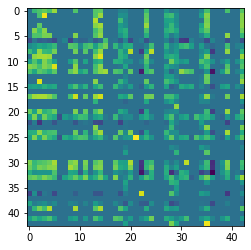

In [11]:
plt.imshow(connectivity_mat)

In [47]:
with open('/home/IBGNN/datasets/Schiza.txt', 'w') as f:
    for name in names_map.values():
        f.write(f'0\t0\t0\t{name}\t0\tregion_name\n')
    

In [16]:
labels = data['target']

In [17]:
np.unique(labels)

array(['No_Known_Disorder', 'Schizoaffective', 'Schizophrenia_Strict'],
      dtype=object)

In [18]:
data_schizastrict = data.drop(data[data['target'] == 'Schizoaffective'].index, axis='index')

In [29]:
labels_schizastrict = data_schizastrict['target']

In [30]:
labels_bin = [1. if ('Schizo' in l) else 0. for l in labels_schizastrict]

In [22]:
connectivity_data = np.asarray(list([get_adjmat(pd.DataFrame(pat).T) for pat in data_schizastrict.to_numpy()]))

In [23]:
connectivity_data.shape

(152, 39, 39)

In [24]:
from scipy.io import savemat, loadmat

In [31]:
savemat('/home/IBGNN/datasets/schiza.mat', {'label': labels_bin, 'dti': connectivity_data.T})

In [32]:
loadmat('/home/IBGNN/datasets/schiza.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Oct 17 13:19:02 2022',
 '__version__': '1.0',
 '__globals__': [],
 'label': array([[0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
         0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
         1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
         1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
         0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
         1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
         0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
         0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
         0., 0., 1., 0., 0., 0., 1., 0.]]),
 'dti': array([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0.,

In [ ]:
!cd /home/IBGNN && python main_explainer.py --dataset_name=schiza --explain

0	0	0	0	0	region_name

0	0	0	1	0	region_name

0	0	0	2	0	region_name

0	0	0	3	0	region_name

0	0	0	4	0	region_name

0	0	0	5	0	region_name

0	0	0	6	0	region_name

0	0	0	7	0	region_name

0	0	0	8	0	region_name

0	0	0	9	0	region_name

0	0	0	10	0	region_name

0	0	0	11	0	region_name

0	0	0	12	0	region_name

0	0	0	13	0	region_name

0	0	0	14	0	region_name

0	0	0	15	0	region_name

0	0	0	16	0	region_name

0	0	0	17	0	region_name

0	0	0	18	0	region_name

0	0	0	19	0	region_name

0	0	0	20	0	region_name

0	0	0	21	0	region_name

0	0	0	22	0	region_name

0	0	0	23	0	region_name

0	0	0	24	0	region_name

0	0	0	25	0	region_name

0	0	0	26	0	region_name

0	0	0	27	0	region_name

0	0	0	28	0	region_name

0	0	0	29	0	region_name

0	0	0	30	0	region_name

0	0	0	31	0	region_name

0	0	0	32	0	region_name

0	0	0	33	0	region_name

0	0	0	34	0	region_name

0	0	0	35	0	region_name

0	0	0	36	0	region_name

0	0	0	37	0	region_name

0	0	0	38	0	region_name

[[0.0, 0.0, 0.0, 0, 'region_name\n'], [0.0, 0.0, 0.0, 1, 'region_name\n'],